<a href="https://colab.research.google.com/github/leusto/ciencia_de_dados/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN


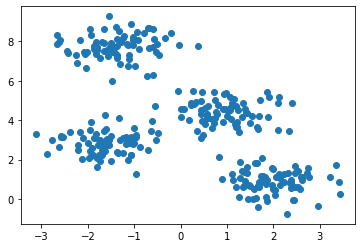

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [9]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X)


In [10]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [11]:
labels = db.labels_
labels

array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
        2,  3,  3,  2,  2,  1,  3,  3, -1,  2,  1,  3,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  3,  2,  1,  3, -1,  1,  3,  3,  0,  3,  0,  2,  3,
        2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1, -1,  3,  3,  3,  0,  2,
        0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
        1,  2,  1, -1,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
        0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
        1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
        3,  0,  1,  0,  0,  3,  1, -1,  1,  3,  0,  1,  0,  0,  0,  1, -1,
        1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3, -1,  1,  2,  1,
        1,  0,  2,  1, -1,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
        1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
        1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,  3,  2, -1,  1,  0,
        2,  2,  3,  2,  3

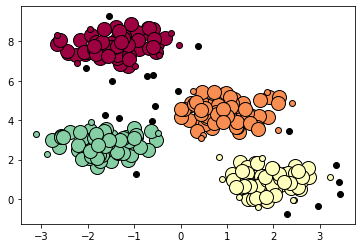

In [12]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.show()

**Referência**

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py